# Market Segmentation with Clustering - Lab

## Introduction

In this lab, you'll use your knowledge of clustering to perform market segmentation on a real-world dataset!

## Objectives

In this lab you will: 

- Use clustering to create and interpret market segmentation on real-world data 

## Getting Started

In this lab, you're going to work with the [Wholesale customers dataset](https://archive.ics.uci.edu/ml/datasets/wholesale+customers) from the UCI Machine Learning datasets repository. This dataset contains data on wholesale purchasing information from real businesses. These businesses range from small cafes and hotels to grocery stores and other retailers. 

Here's the data dictionary for this dataset:

|      Column      |                                               Description                                              |
|:----------------:|:------------------------------------------------------------------------------------------------------:|
|       FRESH      |                    Annual spending on fresh products, such as fruits and vegetables                    |
|       MILK       |                               Annual spending on milk and dairy products                               |
|      GROCERY     |                                   Annual spending on grocery products                                  |
|      FROZEN      |                                   Annual spending on frozen products                                   |
| DETERGENTS_PAPER |                  Annual spending on detergents, cleaning supplies, and paper products                  |
|   DELICATESSEN   |                           Annual spending on meats and delicatessen products                           |
|      CHANNEL     | Type of customer.  1=Hotel/Restaurant/Cafe, 2=Retailer. (This is what we'll use clustering to predict) |
|      REGION      |            Region of Portugal that the customer is located in. (This column will be dropped)           |



One benefit of working with this dataset for practice with segmentation is that we actually have the ground-truth labels of what market segment each customer actually belongs to. For this reason, we'll borrow some methodology from Supervised Learning and store these labels separately, so that we can use them afterwards to check how well our clustering segmentation actually performed. 

Let's get started by importing everything we'll need.

In the cell below:

* Import `pandas`, `numpy`, and `matplotlib.pyplot`, and set the standard alias for each. 
* Use `numpy` to set a random seed of `0`.
* Set all matplotlib visualizations to appear inline.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
np.random.seed(0)

In [3]:
plt.style.use('ggplot')

Now, let's load our data and inspect it. You'll find the data stored in `'wholesale_customers_data.csv'`. 

In the cell below, load the data into a DataFrame and then display the first five rows to ensure everything loaded correctly.

In [4]:
raw_df = pd.read_csv('./wholesale_customers_data.csv')
raw_df.tail()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125
439,1,3,2787,1698,2510,65,477,52


In [5]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


In [6]:
raw_df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


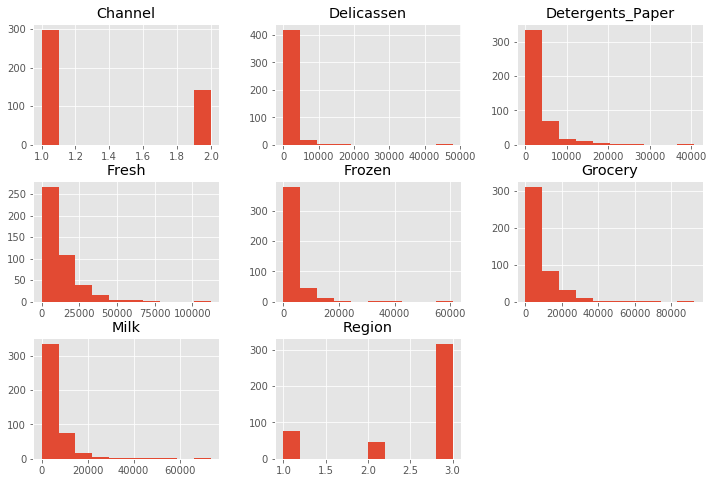

In [7]:
raw_df.hist(figsize=(12,8));

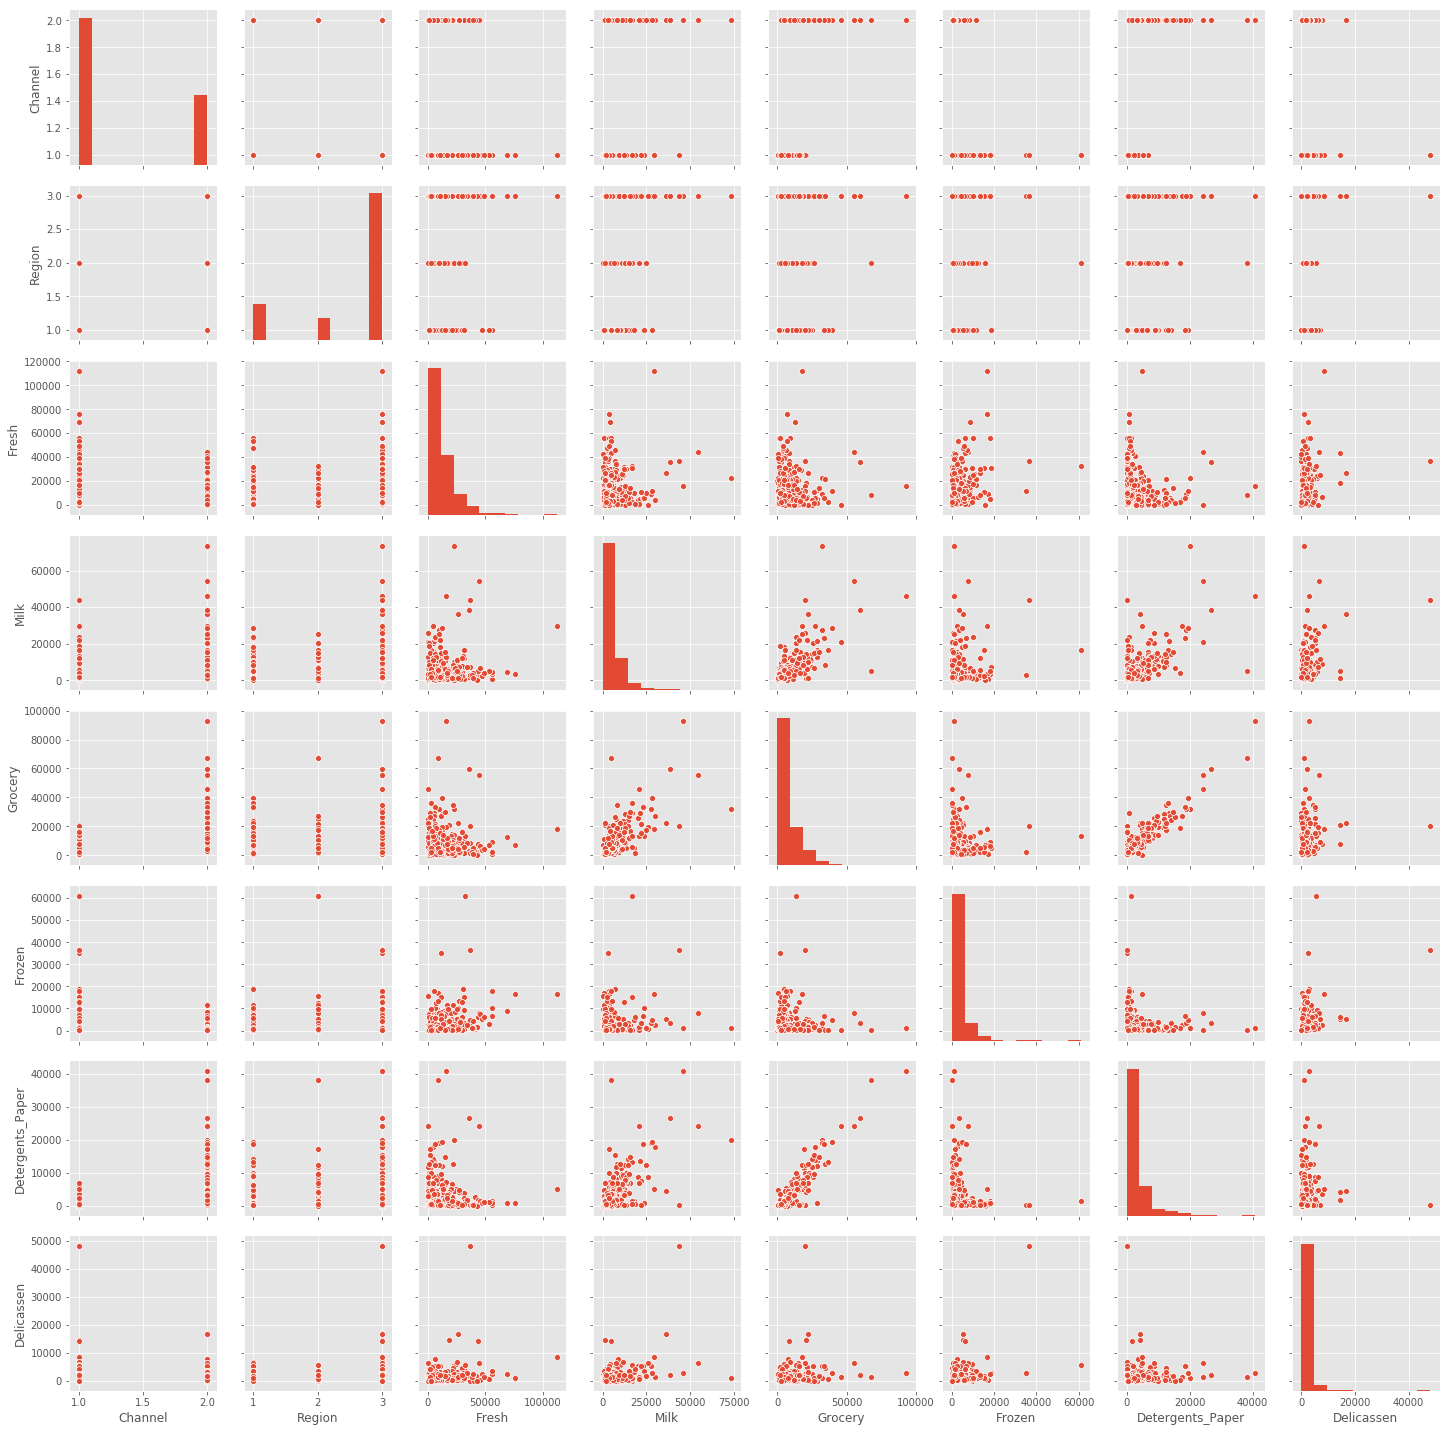

In [8]:
sns.pairplot(raw_df);

Now, let's go ahead and store the `'Channel'` column in a separate variable, and then drop both the `'Channel'` and `'Region'` columns. Then, display the first five rows of the new DataFrame to ensure everything worked correctly. 

In [9]:
df = raw_df.copy()

In [10]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [11]:
channels = df['Channel']
df = df.drop(['Channel', 'Region'], axis=1)
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


Now, let's get right down to it and begin our clustering analysis. 

In the cell below:

* Import `KMeans` from `sklearn.cluster`, and then create an instance of it. Set the number of clusters to `2`
* Fit it to the data (`df`) 
* Get the predictions from the clustering algorithm and store them in `cluster_preds` 

In [15]:
from sklearn.cluster import KMeans

In [17]:
k_means = KMeans(n_clusters=2)
model = k_means.fit(df)
cluster_preds = model.predict(df)
len(cluster_preds)

440

Now, use some of the metrics to check the performance. You'll use `calinski_harabasz_score()` and `adjusted_rand_score()`, which can both be found inside `sklearn.metrics.cluster`. 

In the cell below, import these scoring functions. 

In [18]:
from sklearn.metrics.cluster import calinski_harabaz_score, adjusted_rand_score

Now, start with CH score, to get the variance ratio. 

In [19]:
calinski_harabaz_score(df, cluster_preds)

171.68461633384186

Although you don't have any other numbers to compare this to, this is a pretty low score, suggesting that the clusters aren't great. 

Since you actually have ground-truth labels in this case, you use `adjusted_rand_score()` to check how well the clustering performed. Adjusted Rand score is meant to compare two clusterings, which the score can interpret our labels as. This will tell us how similar the predicted clusters are to the actual channels. 

Adjusted Rand score is bounded between -1 and 1. A score close to 1 shows that the clusters are almost identical. A score close to 0 means that predictions are essentially random, while a score close to -1 means that the predictions are pathologically bad, since they are worse than random chance. 

In the cell below, call `adjusted_rand_score()` and pass in `channels` and `cluster_preds` to see how well your first iteration of clustering performed. 

In [21]:
adjusted_rand_score(channels, cluster_preds)

-0.03060891241109425

According to these results, the clusterings were essentially no better than random chance. Let's see if you can improve this. 

### Scaling our dataset

Recall that K-means clustering is heavily affected by scaling. Since the clustering algorithm is distance-based, this makes sense. Let's use `StandardScaler` to scale our dataset and then try our clustering again and see if the results are different. 

In the cells below:

* Import and instantiate [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) and use it to transform the dataset  
* Instantiate and fit K-means to this scaled data, and then use it to predict clusters 
* Calculate the adjusted Rand score for these new predictions 

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
# Scale df
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

C:\Users\deon\Anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\deon\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [25]:
scaled_k_means = KMeans(n_clusters=2)
model = scaled_k_means.fit(scaled_df)
scaled_preds = model.predict(scaled_df)

In [26]:
adjusted_rand_score(channels, scaled_preds)

0.19214043169327583

That's a big improvement! Although it's not perfect, we can see that scaling our data had a significant effect on the quality of our clusters. 

## Incorporating PCA

Since clustering algorithms are distance-based, this means that dimensionality has a definite effect on their performance. The greater the dimensionality of the dataset, the greater the total area that we have to worry about our clusters existing in. Let's try using Principal Component Analysis to transform our data and see if this affects the performance of our clustering algorithm. 

Since you've already seen PCA in a previous section, we will let you figure this out by yourself. 

In the cells below:

* Import [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) from the appropriate module in sklearn 
* Create a `PCA` instance and use it to tranform our scaled data  
* Investigate the explained variance ratio for each Principal Component. Consider dropping certain components to reduce dimensionality if you feel it is worth the loss of information 
* Create a new `KMeans` object, fit it to our pca-transformed data, and check the adjusted Rand score of the predictions it makes. 

**_NOTE:_** Your overall goal here is to get the highest possible adjusted Rand score. Don't be afraid to change parameters and rerun things to see how it changes. 

In [27]:
from sklearn.decomposition import PCA

In [32]:
pca = PCA(n_components=4)
pca_df = pca.fit_transform(scaled_df)


In [29]:
np.cumsum(pca.explained_variance_ratio_)

array([0.44082893, 0.72459292, 0.84793705, 0.94189209])

In [31]:
pca = PCA(n_components=4)
pca_df = pca.fit(scaled_df)
np.cumsum(pca.explained_variance_ratio_)

array([0.44082893, 0.72459292, 0.84793705, 0.94189209])

In [33]:
pca_k_means = KMeans(n_clusters=2)
pca_k_means.fit(pca_df)
pca_preds = pca_k_means.predict(pca_df)
adjusted_rand_score(channels, pca_preds)

0.212843835451224

**_Question_**:  What was the Highest Adjusted Rand Score you achieved? Interpret this score, and determine the overall quality of the clustering. Did PCA affect the performance overall?  How many principal components resulted in the best overall clustering performance? Why do you think this is?

Write your answer below this line:
_______________________________________________________________________________________________________________________________

In [ ]:
"""The highest ARS should be ~0.23, which suggests that the clusters are better than random chance, 
but far from perfect.  Overall, the quality of the clustering algorithm did a lot better than the 
first algorithm we ran on unscaled data. The best performance was achieved when reducing the 
number of principal components down to 4. The increase in model performance is likely due to the 
reduction in dimensionality. Although dropping the last 2 PCs means that we lose about 6% of 
our explained variance, this proved to be a net-positive trade-off for the reduction in dimensionality 
it provided. """

## Optional (Level up) 

### Hierarchical Agglomerative Clustering

Now that we've tried doing market segmentation with K-means clustering, let's end this lab by trying with HAC!

In the cells below, use [Agglomerative clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) to make cluster predictions on the datasets we've created, and see how HAC's performance compares to K-mean's performance. 

**_NOTE_**: Don't just try HAC on the PCA-transformed dataset -- also compare algorithm performance on the scaled and unscaled datasets, as well! 

In [34]:
from sklearn.cluster import AgglomerativeClustering

hac = AgglomerativeClustering(n_clusters=2)
hac.fit(pca_df)
hac_pca_preds = hac.labels_
adjusted_rand_score(channels, hac_pca_preds)

0.04822381910875346

In [35]:
from sklearn.cluster import AgglomerativeClustering

hac = AgglomerativeClustering(n_clusters=2)
hac.fit(pca_df)
hac_pca_preds = hac.labels_
adjusted_rand_score(channels, hac_pca_preds)

0.04822381910875346

In [36]:
hac3 = AgglomerativeClustering(n_clusters=2)
hac3.fit(df)
hac__preds = hac3.labels_
adjusted_rand_score(channels, hac__preds)

-0.01923156414375716

## Summary

In this lab, you used our knowledge of clustering to perform a market segmentation on a real-world dataset. You started with a cluster analysis with poor performance, and then implemented some changes to iteratively improve the performance of the clustering analysis!